# Health Survey Data Analysis

Adrianna DAndrade 

## Executive Summary

The goal of this project is to determine whether or not there is a difference in health based on whether or not someone is renting or owning property. The findings conclude there is a statistically significant difference between homeowners and renters

## The Data

The data used for this analysis is from the CDC Behavioral Risk Factor Surveillance System (BRFSS).Specifically this subset of the data represents survey responses from the 2020-2021 survey in the state of New York. The survey contains over 10,000 responses. The 'PHYSHLTH' is the respose to the question 'Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?'. The 'RENTHOM1' column is the demographoc feature response answering 'Do you own or rent your home?'. 

In [302]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import math

file_path = "https://raw.githubusercontent.com/learn-co-curriculum/da-phase3-project-enterprise/main/brfss_ny.csv"
df = pd.read_csv(file_path)

## Data Preparation

First, I checked for any blank values for PHYSHLTH column. There was no blank values. I then replaced all 88.0 values with 0. Lastly, I deleted all values that were not in the range of 0-30 for the PHYSHLTH column. For the RENTHOM1 column I deleted all values that were not rent or home, 1 or 2 respectively. 

In [303]:
# Check for missing Values 
df['PHYSHLTH'].isna().sum()

0

In [304]:
#Replace 88.0 with 0 to reflect no non-healthy days 
df['PHYSHLTH'].replace(88.0,0, inplace=True)
df['PHYSHLTH'].count()

14769

In [305]:
#Remove null values and check 
df1 = df[df.PHYSHLTH <= 30 ]
df1.count()

_STATE      14440
FMONTH      14440
IDATE       14440
IMONTH      14440
IDAY        14440
            ...  
_STOLDNA     6032
_VIRCOLN     5936
_SBONTIM     6874
_CRCREC1     6013
_AIDTST4    12831
Length: 279, dtype: int64

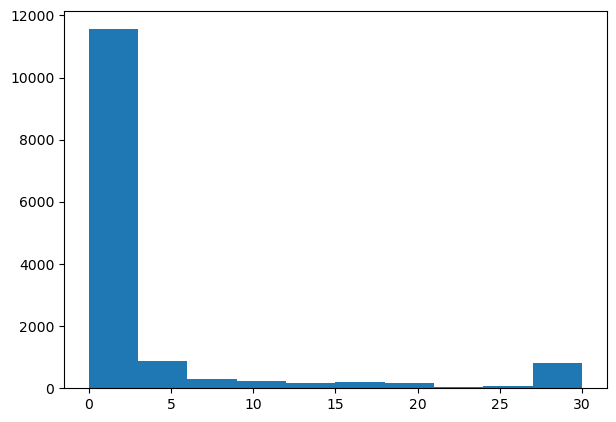

In [306]:
#Check distribution of PHYSHLTH
x = df1['PHYSHLTH']
plt.hist(x);

In [307]:
# Seperate Renters from Homeowners
REN = df1.loc[(df['RENTHOM1'] <= 2)]
REN1 = df1.loc[(df['RENTHOM1'] == 1)]
REN2 = df1.loc[(df['RENTHOM1'] == 2)]

In [308]:
# Check RENTHOM1 column 
REN['RENTHOM1'].describe()

count    13659.000000
mean         1.381141
std          0.485685
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: RENTHOM1, dtype: float64

## Confidence Interval for Mean of `PHYSHLTH`

In [309]:
#Check PHYSHLTH column
df1['PHYSHLTH'].max()

30.0

In [310]:
#Calculate mean an standard deviation of PHYSHLTH
print(PH1_mean)
PH1_std

3.0837950138504153


7.5927152785971

In [311]:
#Calculate Sample Size
PH1_size = df1['PHYSHLTH'].count()
PH1_size

14440

In [312]:
# Calculate a 95% confidence interval about the mean of PHYSHLTH
PH1_mean = df1['PHYSHLTH'].mean()
PH1_std = df1['PHYSHLTH'].std()
PH1_se = PH1_std/math.sqrt(PH1_size)
z = stats.norm.ppf(q = 0.95)
PH1_moe = z * (PH1_std/math.sqrt(14440))
PH1_moe
PH1_conf = (PH1_mean - PH1_moe, PH1_mean + PH1_moe)
print(PH1_conf)

(2.9798650503830366, 3.187724977317794)


In [313]:
# Calculate a 95% confidence interval about the mean of PHYSHLTH(T-distribution method)
PH1_mean = df1['PHYSHLTH'].mean()
ci_tstat = stats.t.interval(
    alpha=0.95,         # Confidence level
    df=PH1_size  - 279, # Degrees of freedom
    loc=PH1_mean,    # Sample mean
    scale=PH1_se            # Standard error
)
ci_tstat

(2.959944238356734, 3.2076457893440966)

# Interpretation of Confidence Interval
If we pulled 14440 samples and constructed confidence intervals in the same manner, we would expect that 95 of the intervals would contain the true mean of population age.

# Split the data based on `RENTHOM1` in Markdown

    To split the data based on RENTHOM1 means that we are seperating respondants based on whether or not they rent or own A home

In [314]:
# separate the records based on the value of RENTHOM1
REN1 = df1.loc[(df['RENTHOM1'] == 1)]
REN2 = df1.loc[(df['RENTHOM1'] == 2)]

In [315]:
# Seperatethe above records with respect to PHYSHLTH
phy1_diff = REN1['PHYSHLTH']
phy2_diff = REN2['PHYSHLTH']

In [316]:
#Calculate mean of both groups 
phy1_diff_mean = phy1_diff.mean()
phy2_diff_mean = phy2_diff.mean()

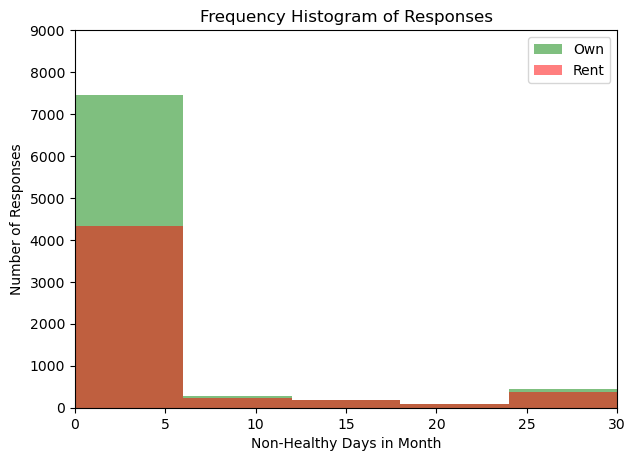

In [317]:
# Plots that show the value of PHYSHLTH based on the value of RENTHOM1
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
kwargs = dict(alpha=0.5, bins=5)

plt.hist(phy1_diff, **kwargs, color='g', label='Own')
plt.hist(phy2_diff, **kwargs, color='r', label='Rent')
plt.gca().set(title='Frequency Histogram of Responses', ylabel='Number of Responses', xlabel = 'Non-Healthy Days in Month')
plt.ylim(0,9000)
plt.xlim(0,30)
plt.legend();

# Explanation of Plot
According to the plot, the number of responses who have more non-healthy days tend to rent as opposed to own a home. 

# Hypothesis of 2-tailed 

𝐻0 : The mean difference between renter and owners groups is zero, 𝜇0=𝜇1

𝐻1(2-tailed, >): The parameter of interest, our mean difference between renters and owners, is different than zero.

In [318]:
stats.ttest_ind(phy1_diff, phy2_diff)

Ttest_indResult(statistic=-7.653280527933314, pvalue=2.0902050539473093e-14)

# Interpretation of Results 

We can reject the null hypothesis at an alpha of 0.05. A p-value less than 0.05 (typically ≤ 0.05) is statistically significant. It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct (and the results are random). Therefore, we reject the null hypothesis, and accept the alternative hypothesis.

## Next Steps : Proposistion


I would propose using the amount of excercise(EXERANY2) respondants do to control for any other factors that might contribute to having good health. 